# Evaluating ECLand Emulator on ISMN data

In adjusting the flags, we can choose the network, station, soil variable and layer for evaluation. Here we run this example with soil temperature.

In [1]:
import torch
import yaml
import os
import sys
import matplotlib.pyplot as plt

parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)

from data_module import *
from evaluation_module import *
from forecast_module import *
from helpers import *
from observation_module import *
from tests.test_model import *
from visualisations import *

set_global_seed(42)

SCRIPT_DIR = os.getcwd()
sys.path.append(os.path.dirname(SCRIPT_DIR))
print(SCRIPT_DIR) 

path_to_plots = '../plots/'
path_to_results = '../results/'

network =  'soil_TERENO_ISMN_2022.nc'#'soil_SMOSMANIA_ISMN_2022.nc' # 'soil_TERENO_ISMN_2022.nc'
station = 'Gevenich'# 'Lahas'
variable = 'st'
depth = [0.05, 0.2, 0.5]

models = ['mlp', 'lstm', "xgb"] # , 'xgb'

/etc/ecmwf/nfs/dh1_home_a/pamw/PycharmProjects/forecast-horizons/ecland-emulator
cpu
/etc/ecmwf/nfs/dh1_home_a/pamw/PycharmProjects/forecast-horizons/ecland-emulator/notebooks


/perm/pamw/venvs/myevalenv/lib/python3.12/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


To explore station data and ECLand forecasts, we load the untransformed data and plot it. ECLand slightly overestimates initial soil conditions in January, but most notably is the larger variance compared to the measurements in the first layer. From the dataset we loaded, we select the same global mean and standard deviation from the synthetic data to also z-score the station data. Then we explore their overlay. 
After, we create a hybrid data set with the z-scored station data for soil temperature, that we use for the prognostic initialsation - instead of the ECLand simulations as before. Then we initialise the model with the hybrid data and run the forecast

Select station:  Gevenich
Select depth:  [0.05, 0.2, 0.5]
Extracted year: 2022
Matched station with grid cell:  4106
Converting celsius into kelvin
Resampling to 6-hourly mean.
Length of data set: 1460


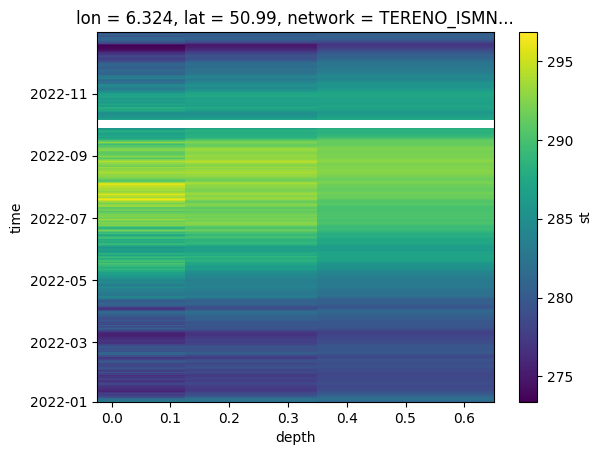

In [2]:
Gevenich = ObservationModule(network = network, 
                             station = station,
                             variable = variable,
                             depth=depth) # Initialise the Observation Module with the default Station (Gevenich)
GevenichPlots = VisualisationModule(network = network,
                                    station = station,
                                    variable = variable,
                                    path_to_plots=path_to_plots)

Gevenich.load_station() # Load station data
Gevenich.load_forcing() # Load forcing for matching data base with station data
closest_grid_cell = Gevenich.match_station_with_forcing() # Match the station with clostest grid cell and extract the index of the grid cell
station_data = Gevenich.process_station_data() 

Gevenich.plot_station_data(save_to = path_to_plots)

mlp
Opening ../../configs/mlp_emulator.yaml for experiment configuration.
{'batch_size': 4, 'clim_feats': ['clim_clake', 'clim_ldepth', 'clim_ctype', 'clim_cell_area', 'clim_glm', 'clim_cu', 'clim_cvh', 'clim_cvl', 'clim_tvh', 'clim_tvl', 'clim_sotype', 'clim_geopot', 'clim_sdfor', 'clim_sdor', 'clim_theta_cap', 'clim_theta_pwp', 'clim_veg_covh', 'clim_veg_covl', 'clim_veg_z0mh', 'clim_veg_z0ml', 'clim_veg_rsminh', 'clim_veg_rsminl'], 'continue_training': False, 'db_path': '/ec/res4/hpcperm/daep/ec_land_training_db/ecland_i6aj_o400_2010_2022_6h_euro.zarr', 'device': 'cpu', 'devices': 1, 'diag_transform': 'zscoring', 'dropout': 0.1852693061424568, 'dyn_transform': 'zscoring', 'dynamic_feats': ['met_ctpf', 'met_lwdown', 'met_psurf', 'met_qair', 'met_rainf', 'met_swdown', 'met_snowf', 'met_tair', 'met_wind_e', 'met_wind_n', 'lai_hv', 'lai_lv'], 'end_year': 2019, 'file_path': '/ec/res4/hpcperm/daep/ec_land_training_db/ecland_i6aj_o400_2010_2022_6h_euro.zarr', 'hidden_dim': [122, 47, 103, 1

/etc/ecmwf/nfs/dh1_home_a/pamw/PycharmProjects/forecast-horizons/ecland-emulator/forecast_module.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.loa

Model to device: cpu
Initialised prediction.
Setting model to evaluation mode
on step 0...
on step 1000...
--- 0.19744467735290527 seconds ---
--- 0.003290744622548421 minutes ---
y_prog shape:  torch.Size([1335, 1, 7])
y_prog_prediction shape:  torch.Size([1335, 1, 7])
Backtransforming
Opening ../../configs/lstm_emulator.yaml for experiment configuration.
{'clim_feats': ['clim_clake', 'clim_ldepth', 'clim_ctype', 'clim_cell_area', 'clim_glm', 'clim_cu', 'clim_cvh', 'clim_cvl', 'clim_tvh', 'clim_tvl', 'clim_sotype', 'clim_geopot', 'clim_sdfor', 'clim_sdor', 'clim_theta_cap', 'clim_theta_pwp', 'clim_veg_covh', 'clim_veg_covl', 'clim_veg_z0mh', 'clim_veg_z0ml', 'clim_veg_rsminh', 'clim_veg_rsminl'], 'dynamic_feats': ['met_ctpf', 'met_lwdown', 'met_psurf', 'met_qair', 'met_rainf', 'met_swdown', 'met_snowf', 'met_tair', 'met_wind_e', 'met_wind_n', 'lai_hv', 'lai_lv'], 'targets_prog': ['swvl1', 'swvl2', 'swvl3', 'stl1', 'stl2', 'stl3', 'snowc'], 'targets_diag': None, 'file_path': '/ec/res4/

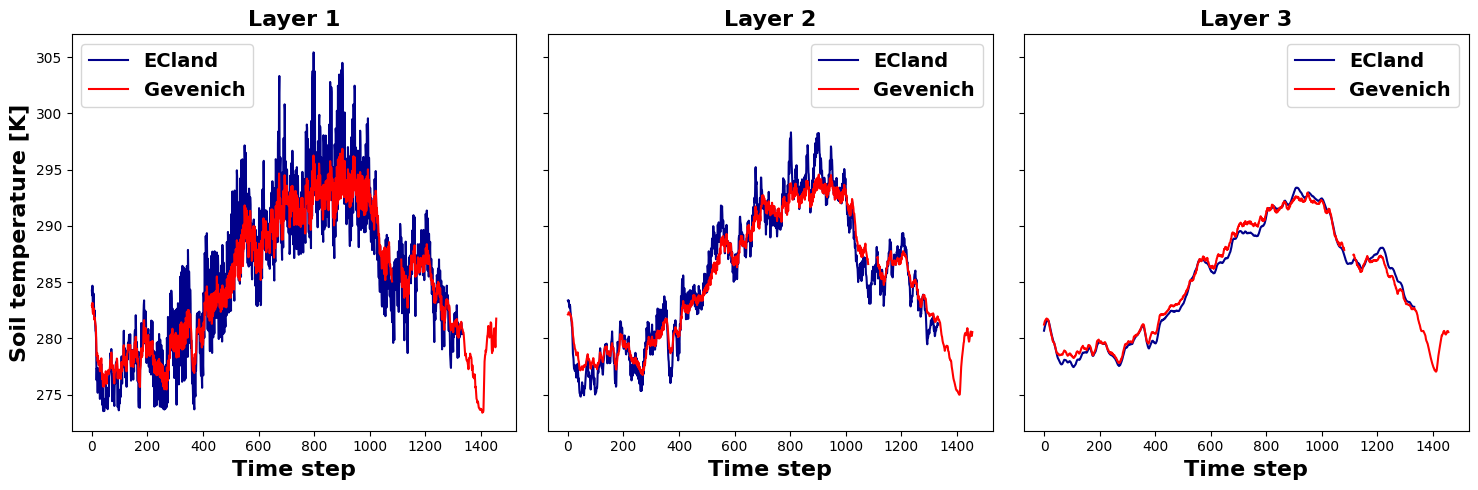

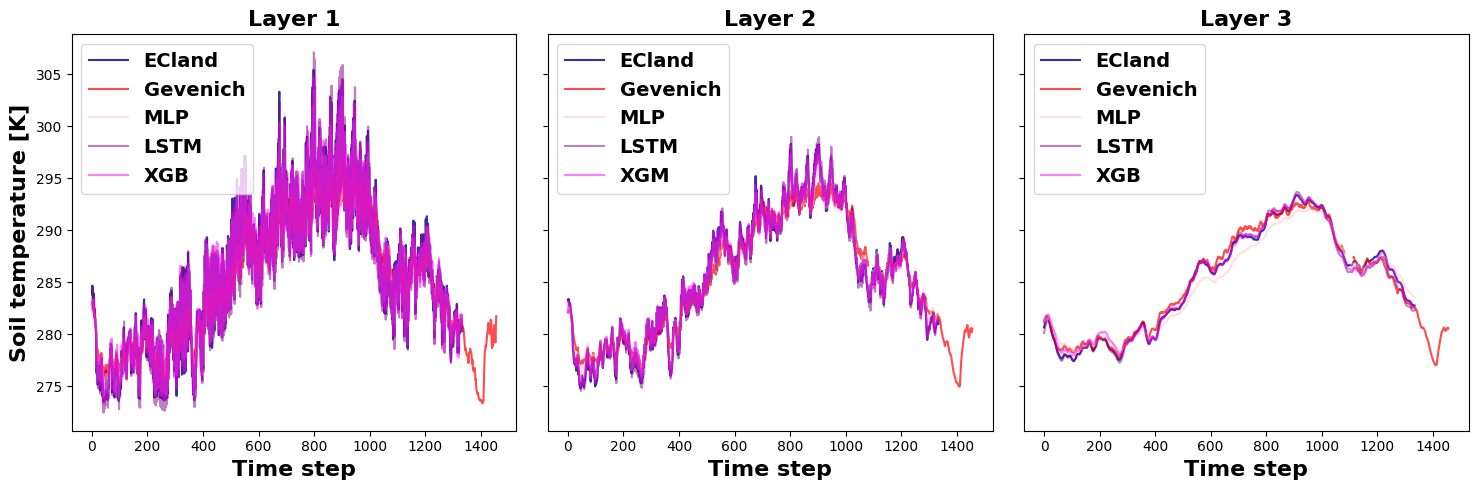

In [3]:
dynamic_features_dict = {}
dynamic_features_prediction_dict = {}

for mod in models:

    # initialise experiement and setup model with config file
    #CONFIG, HPARS, ForecastModel = setup_experiment(model = mod)
    if mod == 'mlp':
        print('mlp')
        CONFIG = load_config(config_path = '../../configs/mlp_emulator.yaml')
        HPARS = load_hpars(use_model = '../mlp')
        ForecastModel = ForecastModuleMLP(hpars=HPARS, config=CONFIG)    
    elif mod == 'lstm':
        CONFIG = load_config(config_path = '../../configs/lstm_emulator.yaml')
        HPARS = load_hpars(use_model = '../lstm')
        ForecastModel = ForecastModuleLSTM(hpars=HPARS, config=CONFIG)
    elif mod == 'xgb':
        CONFIG = load_config(config_path = '../../configs/xgb_emulator.yaml')
        HPARS = None
        ForecastModel = ForecastModuleXGB(hpars=HPARS, config=CONFIG)

    CONFIG['x_slice_indices'] = closest_grid_cell # adjust the index of the grid cell in the config file before initialising the models

    dataset = ForecastModel.initialise_dataset()
    model = ForecastModel.load_model()
    x_static, x_met, y_prog = ForecastModel.load_test_data(dataset)  

    y_prog_hybrid = y_prog.clone()
    station_data_transformed = Gevenich.transform_station_data(dataset=dataset, target_variables=CONFIG['targets_eval'])
    y_prog_hybrid[...,Gevenich.matching_indices] = station_data_transformed[:y_prog_hybrid.shape[0]]

    if CONFIG["model"] == 'lstm':
        ForecastModel.handle_hindcast(skip=True)
    dynamic_features, dynamic_features_prediction = ForecastModel.run_forecast(initial_conditions=y_prog_hybrid[0,...])
    dynamic_features, dynamic_features_prediction = ForecastModel.backtransformation()

    dynamic_features_dict[mod] = dynamic_features
    dynamic_features_prediction_dict[mod] = dynamic_features_prediction


GevenichPlots.plot_station_data(dynamic_features, station_data, 
                                matching_indices= Gevenich.matching_indices)
GevenichPlots.plot_station_data_and_forecast(dynamic_features_dict, dynamic_features_prediction_dict, station_data,
                                matching_indices= Gevenich.matching_indices)


## Evaluate forecast with relative skill

Then we evaluate both ECLand and AIland forecast:
1) Directly against the station data: $D(y_{ai}, y)$ and $D(y_{ec}, y)$
2) Then both against the observed climatology: $D(y_{ai}, y) / D(y_c, y)$ and $D(y_{ec}, y) / D(y_c, y)$

Dependent on what we want to report, we look at the ensemble scores over time, or at the spatially aggregated scores. D can here be the MSE, such that with 2) we compute the MSESS. It could also be the ACC.

In [7]:
station_data.shape

torch.Size([1460, 1, 3])

In [4]:
# Specify flags in Evaluation module
maximum_evaluation_time = 500
score =  "mae"

layers = {}
for layer in [0,1,2]:
    EvaluateModel = EvaluationModule(score =  score,
                                 layer_index = layer,
                                 variable_indices = Gevenich.matching_indices,
                                 maximum_evaluation_time = maximum_evaluation_time)
    scores = {}
    skill_scores = {}
    for mod in models:

        EvaluateModel.set_samples(observations=station_data,
                                fc_numerical=dynamic_features_dict,
                                fc_emulator=dynamic_features_prediction_dict[mod])
        EvaluateModel.subset_samples()

        scores["ecland"] = EvaluateModel.evaluate_target(model = "numerical")
        scores[mod] = EvaluateModel.evaluate_target(model = mod)
        skill_scores[mod] = EvaluateModel.get_skill_score()
        
    layers[f"layer{layer}"] = {}
    layers[f"layer{layer}"]["scores"] = scores
    layers[f"layer{layer}"]["skill_scores"] = skill_scores

Evaluation with mae
Evaluation with mae
Evaluation with mae


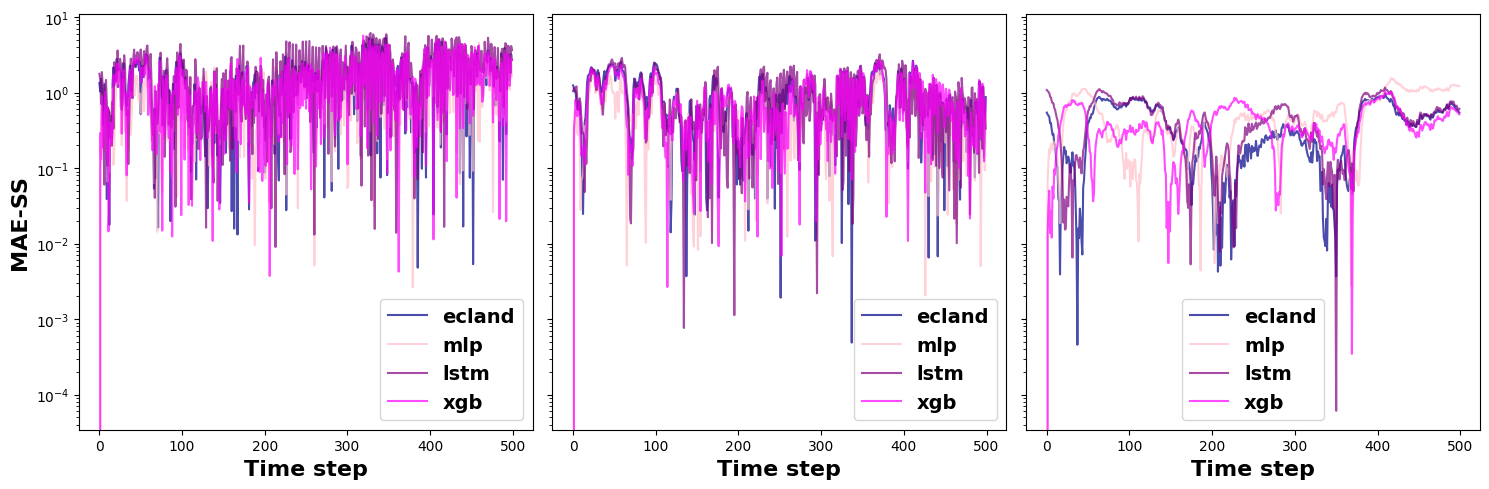

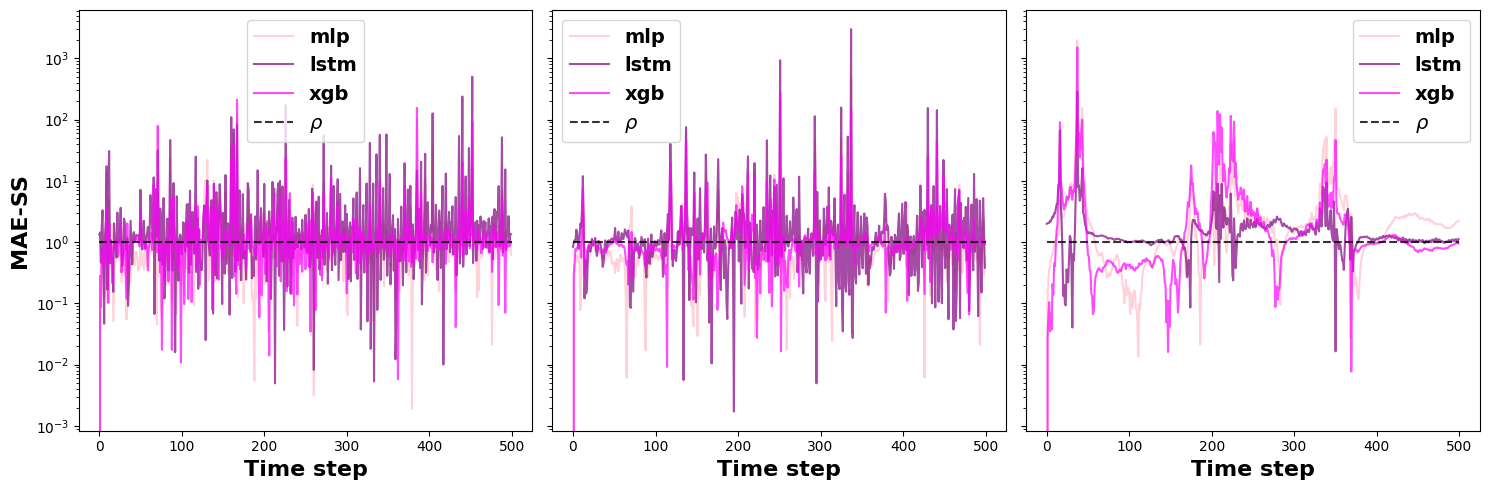

In [6]:
GevenichPlots.plot_scores(layers['layer0']['scores'], layers['layer1']['scores'], layers['layer2']['scores'],
                          score = "MAE",maximum_evaluation_time=maximum_evaluation_time, log_y=True)
GevenichPlots.plot_skill_scores(layers['layer0']['skill_scores'], layers['layer1']['skill_scores'], layers['layer2']['skill_scores'],
                          score = "MAE",maximum_evaluation_time=maximum_evaluation_time, log_y=True)


## Ensemble forecast with initial state perturbation

The following steps are so far applicable only with the MLP. Here, we slightly perturb model forecast **at the first predicted time step after initialisation**, by a magnitude defined by sigma. This timestep is currently $t_0$ for the LSTM which estimates initial conditions from the lookback, but it is $t_1$ for the MLP and XGB that are initialised with observations at $t_0$. We run multiple deterministic forecasts with this disturbance (defined as ensemble here).

In [ ]:
initial_vector = y_prog[0,...]
size = 10
sigma = 0.1

ensemble_prediction = []

for i in range(size):
    dynamic_features, dynamic_features_prediction = ForecastModel.run_forecast(initial_vector, perturbation = sigma)
    dynamic_features, dynamic_features_prediction = ForecastModel.backtransformation()
    ensemble_prediction.append(dynamic_features_prediction)

ensemble_prediction = torch.stack(ensemble_prediction)
print(ensemble_prediction.shape)
print(ensemble_prediction)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True) 

ax[0].plot(dynamic_features[:,:,3], color="blue", label="ecland", alpha = 0.5)
for i in range(size):
    label = "ailand" if i == 0 else None
    ax[0].plot(ensemble_prediction[i, :,:,3], color="green", label=label, alpha = 0.5)
ax[0].plot(station_data[:,:,0], color="salmon", label="station data", alpha = 0.5)
ax[0].set_title("Layer 1")
ax[0].legend()

ax[1].plot(dynamic_features[:,:,4], color="blue", label="ecland", alpha = 0.5)
for i in range(size):
    label = "ailand" if i == 0 else None
    ax[1].plot(ensemble_prediction[i, :,:,4], color="green", label=label, alpha = 0.5)
ax[1].plot(station_data[:,:,1], color="salmon", label="station data", alpha = 0.5)
ax[1].set_title("Layer 2")
ax[1].legend()

ax[2].plot(dynamic_features[:,:,5], color="blue", label="ecland", alpha = 0.5)
for i in range(size):
    label = "ailand" if i == 0 else None
    ax[2].plot(ensemble_prediction[i, :,:,5], color="green", label=label, alpha = 0.5)
ax[2].plot(station_data[:,:,2], color="salmon", label="station data", alpha = 0.5)  
ax[2].set_title("Layer 3")
ax[2].legend()

plt.tight_layout()
plt.show()


In [ ]:
mse_obs = np.sqrt(np.sum((dynamic_features_prediction - dynamic_features)**2, axis = 1))*(1/spatial_fields)
mse_clim = np.sqrt(np.sum((climatology - dynamic_features)**2, axis = 1))*(1/spatial_fields)
msess = 1 - (mse_obs[...,0]/mse_clim[...,0])
plt.plot(msess)

In [ ]:
mse_obs = np.sqrt(np.sum((dynamic_features_prediction - dynamic_features)**2, axis = 1))*(1/spatial_fields)
mse_clim = np.sqrt(np.sum((climatology - dynamic_features)**2, axis = 1))*(1/spatial_fields)

mse_obs = np.sum(np.abs(dynamic_features_prediction - dynamic_features), axis = 1)*(1/spatial_fields)
mse_clim = np.sum(np.abs(climatology - dynamic_features), axis = 1)*(1/spatial_fields)


msess_L1 = 1 - (mse_obs[...,0]/mse_clim[...,0])
msess_L2 = 1 - (mse_obs[...,1]/mse_clim[...,1])
msess_L3 = 1 - (mse_obs[...,2]/mse_clim[...,2])

In [ ]:
# Calculate mean and standard deviations
L1mean1 = np.mean(dynamic_features[...,0], axis=1)
L1std1 = dynamic_features[...,0].std(axis=1)

L1mean2 = np.mean(dynamic_features_prediction[...,0], axis=1)
L1std2 = dynamic_features_prediction[...,0].std(axis=1)

L1mean3 = np.mean(climatology_mu[:len(dynamic_features),:,0], axis=1)
L1std3 = climatology_mu[:len(dynamic_features),:,0].std(axis=1)

L2mean1 = np.mean(dynamic_features[...,1], axis=1)
L2std1 = dynamic_features[...,1].std(axis=1)

L2mean2 = np.mean(dynamic_features_prediction[...,1], axis=1)
L2std2 = dynamic_features_prediction[...,1].std(axis=1)

L2mean3 = np.mean(climatology_mu[:len(dynamic_features),:,1], axis=1)
L2std3 = climatology_mu[:len(dynamic_features),:,1].std(axis=1)

L3mean1 = np.mean(dynamic_features[...,2], axis=1)
L3std1 = dynamic_features[...,2].std(axis=1)

L3mean2 = np.mean(dynamic_features_prediction[...,2], axis=1)
L3std2 = dynamic_features_prediction[...,2].std(axis=1)

L3mean3 = np.mean(climatology_mu[:len(dynamic_features),:,2], axis=1)
L3std3 = climatology_mu[:len(dynamic_features),:,2].std(axis=1)

# Assuming L1mean1, L1std1, L1mean2, L1std2, etc. are defined
x = np.arange(1459)  # Example x-axis values for the tensors

# Create the plot with four subplots (4 rows, 1 column)
fig, axs = plt.subplots(4, 1, figsize=(9,10), sharex=True)

# Plot for Layer 1
axs[0].fill_between(x, L1mean1 - L1std1, L1mean1 + L1std1, color='salmon', alpha=0.5)
axs[0].plot(x, L1mean1, label='ECland', color='salmon')
axs[0].fill_between(x, L1mean2 - L1std2, L1mean2 + L1std2, color='blue', alpha=0.3)
axs[0].plot(x, L1mean2, label='Emulator', color='blue')
axs[0].fill_between(x, L1mean3 - L1std3, L1mean3 + L1std3, color='green', alpha=0.3)
axs[0].plot(x, L1mean3, label='Climatology', color='green')
axs[0].set_ylabel('SWVL1', fontsize=18)
axs[0].legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))


# Plot for Layer 2
axs[1].fill_between(x, L2mean1 - L2std1, L2mean1 + L2std1, color='salmon', alpha=0.5)
axs[1].plot(x, L2mean1, label='ECland', color='salmon')
axs[1].fill_between(x, L2mean2 - L2std2, L2mean2 + L2std2, color='blue', alpha=0.3)
axs[1].plot(x, L2mean2, label='Emulator', color='blue')
axs[1].fill_between(x, L2mean3 - L2std3, L2mean3 + L2std3, color='green', alpha=0.3)
axs[1].plot(x, L2mean3, label='Climatology', color='green')
axs[1].set_ylabel('SWVL2', fontsize=18)
axs[1].legend().remove()

# Plot for Layer 3
axs[2].fill_between(x, L3mean1 - L3std1, L3mean1 + L3std1, color='salmon', alpha=0.5)
axs[2].plot(x, L3mean1, label='ECland', color='salmon')
axs[2].fill_between(x, L3mean2 - L3std2, L3mean2 + L3std2, color='blue', alpha=0.3)
axs[2].plot(x, L3mean2, label='Emulator', color='blue')
axs[2].fill_between(x, L3mean3 - L3std3, L3mean3 + L3std3, color='green', alpha=0.3)
axs[2].plot(x, L3mean3, label='Climatology', color='green')
axs[2].set_ylabel('SWVL3', fontsize=18)
axs[2].legend().remove()

# Plot for MAE in Layer 1, 2, 3
axs[3].plot(msess_L1, label='Layer 1', color='turquoise')
axs[3].plot(msess_L2, label='Layer 2', color='blue')
axs[3].plot(msess_L3, label='Layer 3', color='darkblue')
axs[3].axhline(0, color='black', linestyle='--', linewidth=1)  # Add the horizontal line at y=0
axs[3].set_xlabel('Time', fontsize=18)
axs[3].set_ylabel('MAE', fontsize=18)
axs[3].legend(fontsize=18, loc='upper left', bbox_to_anchor=(1, 1))

axs[0].tick_params(axis='both', labelsize=16)
axs[1].tick_params(axis='both', labelsize=16)
axs[2].tick_params(axis='both', labelsize=16)
axs[3].tick_params(axis='both', labelsize=16)

# Adjust layout to remove vertical space between subplots
plt.subplots_adjust(hspace=0.1)  # Adjust the height space between plots

# Display the plot
plt.tight_layout()
plt.savefig("plots/ailand_horizons.pdf")
plt.show()
